In [140]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [141]:
X_train, y_train, X_test, y_test = pd.read_csv('.//data/X_train.csv'), pd.read_csv('.//data/y_train.csv'), pd.read_csv('.//data/X_test.csv'), pd.read_csv('.//data/y_test.csv')

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    test_size=0.1,
    random_state=42,
    shuffle=True,
    stratify=y_train
)

In [ ]:
y_train['Correto'].replace(['S', 'N'], [1, 0], inplace=True)
y_test['Correto'].replace(['S', 'N'], [1, 0], inplace=True)

In [143]:
y_train

,Correto
0,1
1,1
2,0
3,0
4,0
...,...
1064,1
1065,1
1066,1
1067,1


## 7. Machine Learning Model Building

### Model training

In [144]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

preds = xgb_model.predict(X_train)

### Performance on training set

In [145]:
from sklearn.metrics import confusion_matrix, classification_report
target_names=["S", "N"]
print(classification_report(y_train, preds, target_names=target_names))

              precision    recall  f1-score   support

           S       1.00      0.97      0.98       312
           N       0.99      1.00      0.99       757

    accuracy                           0.99      1069
   macro avg       0.99      0.98      0.99      1069
weighted avg       0.99      0.99      0.99      1069



[Text(0, 0.5, 'S'), Text(0, 1.5, 'N')]

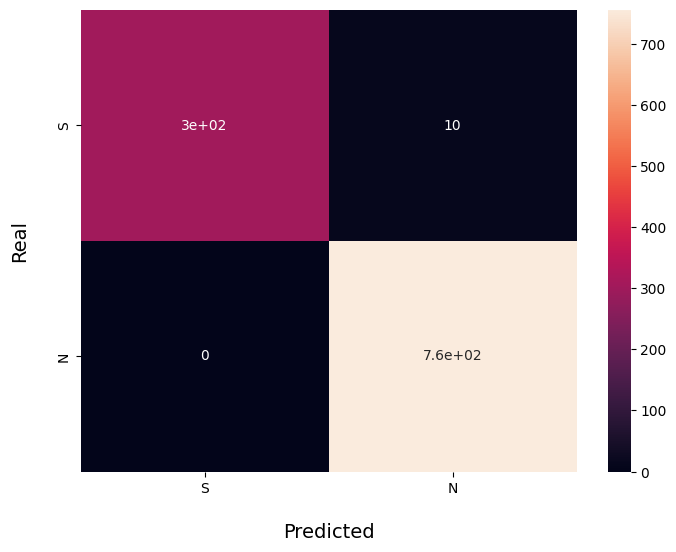

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

cf_matrix = confusion_matrix(y_train, preds)
plt.figure(figsize=(8,6), dpi=100)

ax = sns.heatmap(cf_matrix, annot=True)

# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(target_names)
 
# set y-axis label and ticks
ax.set_ylabel("Real", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(target_names)

## 8. Model Evaluation

In [147]:
test_preds = xgb_model.predict(X_test)

In [148]:
target_names=["S", "N"]
print(classification_report(y_test, test_preds, target_names=target_names))

              precision    recall  f1-score   support

           S       0.35      0.24      0.28       134
           N       0.72      0.82      0.77       325

    accuracy                           0.65       459
   macro avg       0.54      0.53      0.53       459
weighted avg       0.61      0.65      0.63       459



[Text(0, 0.5, 'S'), Text(0, 1.5, 'N')]

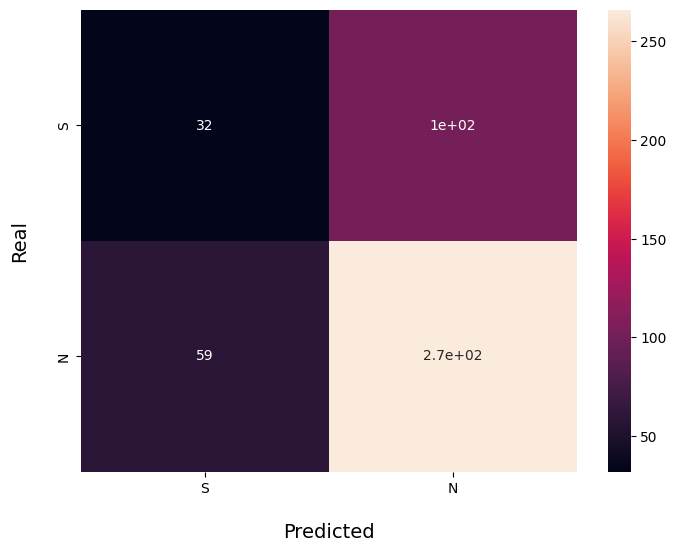

In [149]:
cf_matrix = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8,6), dpi=100)

ax = sns.heatmap(cf_matrix, annot=True)

# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(target_names)
 
# set y-axis label and ticks
ax.set_ylabel("Real", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(target_names)